<a href="https://colab.research.google.com/github/Abitharani-Jeyachandran/Abitharani-Jeyachandran/blob/main/program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
import cv2
import imghdr

In [8]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/train'

In [9]:
os.listdir(data_dir)

['glass', 'metal']

In [10]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [11]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir):
    print(image_class)

glass
metal


<font size="12">Clean Data</font>

In [13]:
for image_class in os.listdir(data_dir):  #loop folder
    for image in os.listdir(os.path.join(data_dir, image_class)): #loop image
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

<font size="12">Load Data</font>

In [14]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 3332 files belonging to 2 classes.


In [15]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
data_iterator

In [18]:
batch = data_iterator.next()

In [19]:
len(batch) #2-images&labels

2

In [20]:
batch[1]

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int32)

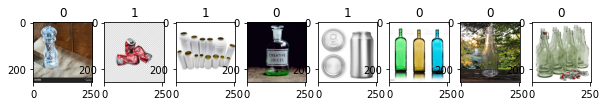

In [21]:
fix, ax = plt.subplots(ncols=8, figsize=(10,10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
#0-glass
#1-metal
#2-plastic

In [22]:
scaled = batch[0]/255

In [23]:
scaled.max()

1.0

<font size="12">Preprocess Data</font>

<font size="4">Scale Data</font>

In [24]:
data = data.map(lambda x,y:(x/255,y)) #quick the process #x-images #y-target variables

In [25]:
data.as_numpy_iterator().next()[0].max()

1.0

<font size="4">Split Data</font>

In [26]:
len(data)

105

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [28]:
train_size

73

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [30]:
validation_inputs, validation_targets = next(iter(val))

<font size="4">Build Deep Learning Model</font>

In [31]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.add(layers.Dense(1, activation='sigmoid'))

In [36]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [38]:
model.evaluate(train, batch_size=10)

73/73 [==============================] - 59s 758ms/step - loss: 0.7296 - accuracy: 0.4598


[0.729630172252655, 0.45976027846336365]

<font size="12">Train Data</font>

In [39]:
logdir='logs'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
hist = model.fit(train, epochs=5, verbose=1, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
73/73 [==============================] - 194s 3s/step - loss: 0.6939 - accuracy: 0.5334 - val_loss: 0.6913 - val_accuracy: 0.5640
Epoch 2/5
73/73 [==============================] - 191s 3s/step - loss: 0.6916 - accuracy: 0.5428 - val_loss: 0.6893 - val_accuracy: 0.5774
Epoch 3/5
73/73 [==============================] - 189s 3s/step - loss: 0.6908 - accuracy: 0.5445 - val_loss: 0.6899 - val_accuracy: 0.5536
Epoch 4/5
73/73 [==============================] - 235s 3s/step - loss: 0.6905 - accuracy: 0.5424 - val_loss: 0.6897 - val_accuracy: 0.5491
Epoch 5/5
73/73 [==============================] - 233s 3s/step - loss: 0.6903 - accuracy: 0.5415 - val_loss: 0.6864 - val_accuracy: 0.5774


In [42]:
hist.history

{'loss': [0.6938889026641846,
  0.6916118264198303,
  0.6908149123191833,
  0.6904951930046082,
  0.6902828812599182],
 'accuracy': [0.5333904027938843,
  0.5428082346916199,
  0.5445205569267273,
  0.542380154132843,
  0.5415239930152893],
 'val_loss': [0.6913464665412903,
  0.6893460154533386,
  0.6898776888847351,
  0.6897270083427429,
  0.6863878965377808],
 'val_accuracy': [0.5639880895614624,
  0.5773809552192688,
  0.5535714030265808,
  0.5491071343421936,
  0.5773809552192688]}

In [43]:
model.save('garbage.h5')

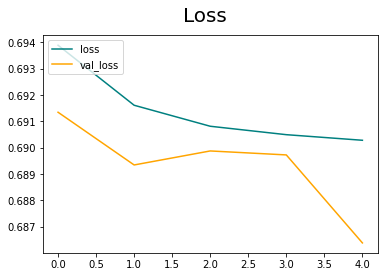

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

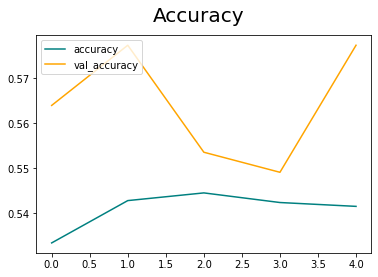

In [45]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<font size="12">Evaluate Data</font>

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [48]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 501ms/step


In [49]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.565625, shape=(), dtype=float32)


<font size="12">Test Data</font>

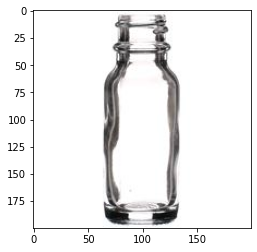

In [51]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/train/glass/glass-1.jpg')
plt.imshow(img)
plt.show()

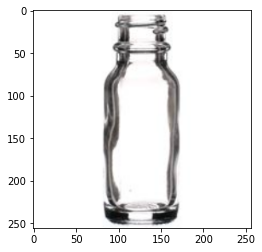

In [52]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 107ms/step


In [54]:
yhat

array([[0.47371662]], dtype=float32)

In [57]:
model.save('/content/drive/MyDrive/Colab Notebooks/garbage-segregation-program1.h5')